In [55]:
import pandas as pd
import numpy as np
from collections import defaultdict

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
players_data=pd.read_excel('players_data.xlsx', sheet_name='Sheet1')
players_data.head()

,player_id,player_name,match_played,team_id,position_name,team_full_name,total_points,season,successful_raids,raid_points,successful_tackles,tackle_points,do_or_die_raid_points,super_raids,super_tackles,super_10s,high_5s
0,2024,Arjun Deshwal,24,3,Raider,Jaipur Pink Panthers,296,Season 9,237,296,0,0,38,7,0,17,0
1,4944,Bharat,23,1,Raider,Bengaluru Bulls,282,Season 9,222,279,3,3,27,11,0,16,0
2,2296,Naveen Kumar,23,2,Raider,Dabang Delhi K.C.,258,Season 9,213,254,3,4,12,3,1,16,0
3,5093,Narender,23,29,Raider,Tamil Thalaivas,249,Season 9,195,243,6,6,40,4,0,15,0
4,143,Maninder Singh,21,4,Raider,Bengal Warriors,240,Season 9,180,238,2,2,19,11,0,14,0


In [3]:
match_data=pd.read_excel('match_data.xlsx', sheet_name='Sheet1')
match_data.head()


,result_code,series_id,event_sub_status,start_date,winning_margin,venue_id,venue_name,game_id,event_name,toss_winner_id,...,team2_raids_done,team2_successful_raids,team2_unsuccessful_raids,team2_empty_raids,team2_tackles_done,team2_successful_tackles,team2_unsuccessful_tackles,team2_all_outs,winning_team_name,winning_team_id
0,W,25,Dabang Delhi K.C. won by 14 Pts,2022-10-07T19:30+05:30,14,1,"Shree Kanteerava Indoor Stadium, Bengaluru",2892,Match 1,2,...,40,13,16,11,26,9,17,0,Dabang Delhi K.C.,2
1,W,25,Bengaluru Bulls won by 5 Pts,2022-10-07T20:30+05:30,5,1,"Shree Kanteerava Indoor Stadium, Bengaluru",2893,Match 2,1,...,40,14,13,13,19,7,12,1,Bengaluru Bulls,1
2,W,25,U.P. Yoddhas won by 2 Pts,2022-10-07T21:30+05:30,2,1,"Shree Kanteerava Indoor Stadium, Bengaluru",2894,Match 3,3,...,39,14,9,16,28,12,16,1,U.P. Yoddhas,30
3,T,25,Match Tied,2022-10-08T19:30+05:30,0,1,"Shree Kanteerava Indoor Stadium, Bengaluru",2895,Match 4,6,...,43,18,11,14,23,8,15,1,Match Tied,0
4,T,25,Match Tied,2022-10-08T20:30+05:30,0,1,"Shree Kanteerava Indoor Stadium, Bengaluru",2896,Match 5,29,...,43,17,6,20,27,8,19,1,Match Tied,0


In [4]:
teams_data=pd.read_excel('teams_data.xlsx', sheet_name='Sheet1')
teams_data.head()

,match_played,team_id,team_name,season,total_points,successful_raids,raid_points,successful_tackles,tackle_points,do_or_die_raid_points,super_raids,super_tackles,total_points_conceded,all_outs_inflicted,all_out_conceded
0,24,3,Jaipur Pink Panthers,Season 9,956,432,519,274,290,70,11,16,758,48,18
1,24,1,Bengaluru Bulls,Season 9,946,440,550,236,254,60,20,18,895,45,36
2,23,2,Dabang Delhi K.C.,Season 9,911,434,542,223,245,59,13,22,926,34,41
3,24,7,Puneri Paltan,Season 9,872,411,507,238,252,80,11,14,808,38,26
4,23,30,U.P. Yoddhas,Season 9,854,384,504,202,224,70,20,22,812,37,29


### Question 2
Is there a significant difference in win rates between matches played by the home team and away team?

In [96]:
df2=match_data[['team1_name', 'team2_name', 'home_team_name', 'winning_team_name']].copy()
teams=teams_data['team_name'].unique()
result=pd.DataFrame(np.zeros((len(teams), 4)), index=teams, columns=['home_wins', 'home_matches', 'away_wins', 'away_matches'])
def update_result(row):
    team1=row['team1_name']
    team2=row['team2_name']
    winning=row['winning_team_name']
    home=row['home_team_name']
    if home=='None':
        result.loc[team1, 'away_matches']+=1
        result.loc[team2, 'away_matches']+=1
        if team1==winning:
            result.loc[team1, 'away_wins']+=1
        elif team2==winning:
            result.loc[team2, 'away_wins']+=1
    else:
        if team1==home:
            result.loc[team1, 'home_matches']+=1
            result.loc[team2, 'away_matches']+=1
            if team1==winning:
                result.loc[team1, 'home_wins']+=1
            elif team2==winning:
                result.loc[team2, 'away_wins']+=1
        else:
            result.loc[team2, 'home_matches']+=1
            result.loc[team1, 'away_matches']+=1
            if team1==winning:
                result.loc[team1, 'away_wins']+=1
            elif team2==winning:
                result.loc[team2, 'home_wins']+=1
df2.apply(update_result, axis=1)
print('done')

done


In [97]:
result['home_win_rate']=result['home_wins']/result['home_matches']
result['away_win_rate']=result['away_wins']/result['away_matches']


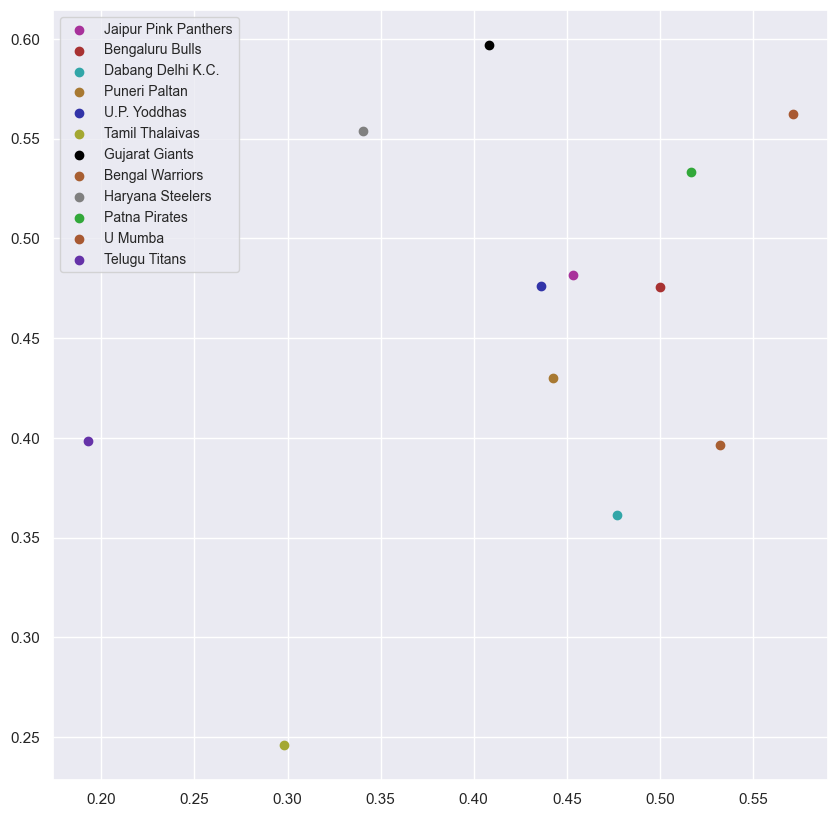

In [120]:
color_dict={'Jaipur Pink Panthers': '#a8329b', 'Bengal Warriors': '#a85f32',
            'Bengaluru Bulls': '#a83232', 'Dabang Delhi K.C.': '#32a6a8',
            'Gujarat Giants': '#000000', 'Haryana Steelers': 'grey', 'Patna Pirates': '#32a83a',
            'Puneri Paltan': '#a87932', 'Tamil Thalaivas': '#a4a832', 'Telugu Titans': '#6532a8',
            'U Mumba': '#a85932', 'U.P. Yoddhas': '#3234a8'}
fig, ax=plt.subplots()
fig.set_size_inches(10, 10)
for team in teams:
    ax.scatter(result.loc[team, 'home_win_rate'], result.loc[team, 'away_win_rate'], color=color_dict[team], label=team)
plt.legend(loc='best', fontsize=10)

### Question 4
Trend between Top two teams having the highest average winning margin in a season and them playing the final of that season?

In [22]:
df4=match_data.copy()
idx1=pd.IndexSlice
result=teams_data[['match_played', 'team_name', 'season']].copy()
result['winning_margin']=0
result.set_index(['season', 'team_name'], inplace=True)
seasons=match_data['season'].unique()
for season in seasons:
    seasons_data=df4.loc[df4['season']==season]
    for index, row in seasons_data.iterrows():
        team1=row['team1_name']
        team2=row['team2_name']
        winning=row['winning_team_name']
        if team1==winning:
            result.loc[idx1[season, team1], 'winning_margin']+=row['winning_margin']
            result.loc[idx1[season, team2], 'winning_margin']-=row['winning_margin']
            
        elif team2==winning:
            result.loc[idx1[season, team1], 'winning_margin']-=row['winning_margin']
            result.loc[idx1[season, team2], 'winning_margin']+=row['winning_margin']
            
result['winning_margin']=result['winning_margin']/result['match_played']
result.reset_index(inplace=True)



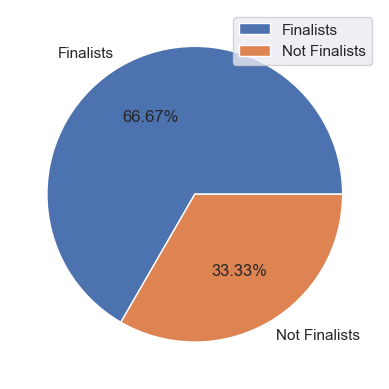

In [58]:
idx4=result.groupby('season')['winning_margin'].idxmax()
max_margins=result.loc[idx4].copy()
final_dict={'Season 1': ['Jaipur Pink Panthers', 'U Mumba'], 'Season 2': ['U Mumba', 'Bengaluru Bulls'],
            'Season 3': ['Patna Pirates', 'U Mumba'], 'Season 4': ['Jaipur Pink Panthers', 'Patna Pirates'],
            'Season 5': ['Patna Pirates', 'Gujarat Giants'], 'Season 6': ['Bengaluru Bulls', 'Gujarat Giants'],
            'Season 7': ['Bengal Warriors', 'Dabang Delhi K.C.'], 'Season 8': ['Dabang Delhi K.C.', 'Patna Pirates'],
            'Season 9': ['Jaipur Pink Panthers', 'Puneri Paltan']}

max_margins['Finalists']=0
for index, row in max_margins.iterrows():
    if row['team_name'] in final_dict[row['season']]:
        max_margins.loc[index, 'Finalists']=1

plt.pie(max_margins['Finalists'].value_counts(), labels=['Finalists', 'Not Finalists'], 
        autopct='%1.2f%%')
plt.legend(loc='best');


### Question 5
Average successful raids and tackles scored by the match winning team in each season?

In [59]:
df5=match_data[['season', 'team1_name', 'team1_successful_raids', 'team1_successful_tackles',
                'team2_name', 'team2_successful_raids', 'team2_successful_tackles', 'winning_team_name']].copy()
seasons=match_data['season'].unique()
result=pd.DataFrame(columns=['average_successful_raids', 'average_successful_tackles'])
for season in seasons:
    matches=0
    raids=0
    tackles=0
    season_data=df5.loc[df5['season']==season]
    for index, row in season_data.iterrows():
        team1=row['team1_name']
        team2=row['team2_name']
        winning=row['winning_team_name']
        if team1==winning:
            matches+=1
            raids+=row['team1_successful_raids']
            tackles+=row['team1_successful_tackles']
        elif team2==winning:
            matches+=1
            raids+=row['team2_successful_raids']
            tackles+=row['team2_successful_tackles']
    result.loc[season]=[raids/matches, tackles/matches]
result


,average_successful_raids,average_successful_tackles
Season 9,17.528000,11.600000
Season 8,17.237288,11.220339
Season 7,16.814516,11.104839
Season 6,16.185484,11.072581
Season 5,15.737705,10.270492
Season 4,13.600000,10.036364
Season 3,14.660714,10.892857
Season 2,13.089286,11.464286
Season 1,17.285714,10.178571


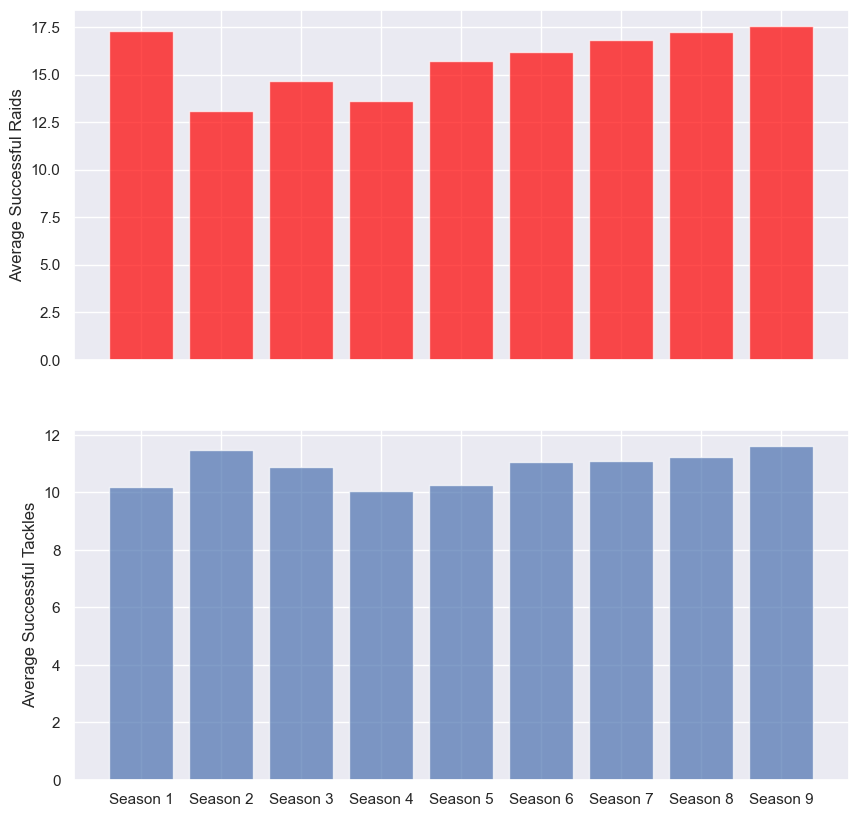

In [80]:
fig, axs=plt.subplots(2, 1, sharex=True)
fig.set_size_inches(10, 10)
axs[0].bar(result.index[::-1], result.average_successful_raids[::-1], color='red', alpha=0.7);
axs[0].set_ylabel('Average Successful Raids')
axs[1].bar(result.index[::-1], result.average_successful_tackles[::-1], alpha=0.7);
axs[1].set_ylabel('Average Successful Tackles');



### Question 6
Are there any fixtures where one team dominates the other?

In [86]:
df5=match_data[['team1_name', 'team2_name', 'winning_team_name']].copy()
teams=teams_data['team_name'].unique()
fixtures=pd.DataFrame(np.zeros((len(teams), len(teams))), index=teams, columns=teams)



In [87]:
def update_fixture(row):
    team1=row['team1_name']
    team2=row['team2_name']
    winning=row['winning_team_name']
    if team1==winning:
        fixtures.loc[team1, team2]+=1
    elif team2==winning:
        fixtures.loc[team2, team1]+=1
df5.apply(update_fixture, axis=1)
fixtures.head()

,Jaipur Pink Panthers,Bengaluru Bulls,Dabang Delhi K.C.,Puneri Paltan,U.P. Yoddhas,Tamil Thalaivas,Gujarat Giants,Bengal Warriors,Haryana Steelers,Patna Pirates,U Mumba,Telugu Titans
Jaipur Pink Panthers,0.0,9.0,11.0,11.0,4.0,4.0,4.0,6.0,7.0,8.0,9.0,8.0
Bengaluru Bulls,8.0,0.0,10.0,7.0,8.0,10.0,5.0,9.0,5.0,5.0,5.0,14.0
Dabang Delhi K.C.,7.0,8.0,0.0,8.0,3.0,5.0,5.0,7.0,5.0,8.0,7.0,7.0
Puneri Paltan,8.0,9.0,11.0,0.0,4.0,4.0,3.0,9.0,7.0,3.0,8.0,10.0
U.P. Yoddhas,5.0,5.0,6.0,6.0,0.0,5.0,2.0,4.0,3.0,5.0,5.0,8.0


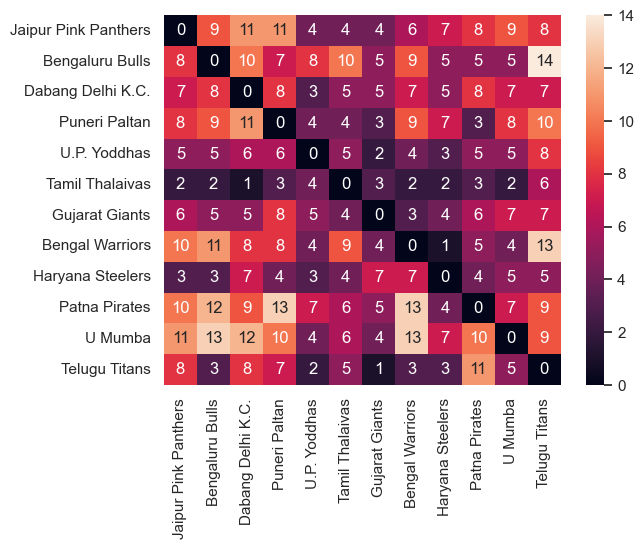

In [89]:
sns.heatmap(fixtures, annot=True);

### Question 7
For each season, which raider has the best do-or-die points to total raid points ratio?

In [35]:
df7=players_data.copy()
df7['ratio']=df7['do_or_die_raid_points']/df7['raid_points']

#to remove zero division errors
df7.dropna(inplace=True)
mean_raids=df7['successful_raids'].mean()

#to remove outliers, some raiders may have very less raids hence high ratio
raider_data=df7[['season', 'player_id', 'player_name', 'ratio']].loc[df7['successful_raids']>mean_raids, :]

In [36]:
#find max ratio indexes and extract data
idx=raider_data.groupby('season')['ratio'].idxmax()
raider_data.loc[idx]

,season,player_id,player_name,ratio
1348,Season 1,85,Rajesh Mondal,0.256410
1212,Season 2,94,Rishank Devadiga,0.568182
1098,Season 3,264,Selvamani K,0.657895
991,Season 4,264,Selvamani K,0.600000
815,Season 5,174,Deepak Kumar Dahiya,0.500000
651,Season 6,2028,Abhishek Singh,0.382979
440,Season 7,3241,Surender Gill,0.380282
234,Season 8,3097,Ajinkya Pawar,0.388889
7,Season 9,757,Sachin,0.380682


### Question 8
For each season, what is the longest winning/losing streak and by which team?

In [70]:
df8=match_data.copy()

streak={}

for season in seasons:
    season_data=df8.loc[df8['season']==season]
    season_data=season_data.sort_values('game_id') 
    team_dict=defaultdict(lambda : 0)
    max_streak=0
    max_team=''
    for index, row in season_data.iterrows():
        team1=row['team1_name']
        team2=row['team2_name']
        winning=row['winning_team_name']
        if team1==winning:
            team_dict[team1]+=1
            team_dict[team2]=0
            if team_dict[team1]>max_streak:
                max_streak=team_dict[team1]
                max_team=team1
        elif team2==winning:
            team_dict[team2]+=1
            team_dict[team1]=0
            if team_dict[team2]>max_streak:
                max_streak=team_dict[team2]
                max_team=team2
    streak[season]=[max_streak, max_team]


In [71]:
streak

{'Season 9': [7, 'Jaipur Pink Panthers'],
 'Season 8': [7, 'Patna Pirates'],
 'Season 7': [7, 'Dabang Delhi K.C.'],
 'Season 6': [8, 'Gujarat Giants'],
 'Season 5': [7, 'Gujarat Giants'],
 'Season 4': [7, 'Telugu Titans'],
 'Season 3': [11, 'U Mumba'],
 'Season 2': [8, 'U Mumba'],
 'Season 1': [7, 'Jaipur Pink Panthers']}